In [1]:
import pandas as pd
import seaborn as sns
import numpy  as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score
import lightgbm as lgb
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score


In [2]:
import numpy as np 
import pandas as pd
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import re
from sklearn import metrics
import seaborn as sn
import lightgbm as lgb

In [3]:
data=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [4]:
data_preprocessed=data.copy()

In [5]:
ST=StandardScaler()

data_preprocessed[['BMI']] = ST.fit_transform(data_preprocessed[['BMI']])
data_preprocessed[['Age']] = ST.fit_transform(data_preprocessed[['Age']])
data_preprocessed[['PhysHlth']] = ST.fit_transform(data_preprocessed[['PhysHlth']])
data_preprocessed[['MentHlth']] = ST.fit_transform(data_preprocessed[['MentHlth']])

In [6]:
QT=QuantileTransformer(n_quantiles=500,output_distribution='normal')

data_preprocessed[['BMI']] = QT.fit_transform(data_preprocessed[['BMI']])
data_preprocessed[['Age']] = QT.fit_transform(data_preprocessed[['Age']])
data_preprocessed[['PhysHlth']] = QT.fit_transform(data_preprocessed[['PhysHlth']])
data_preprocessed[['MentHlth']] = QT.fit_transform(data_preprocessed[['MentHlth']])

In [7]:
cat_features=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',  'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth',  'DiffWalk', 'Sex']
lb = LabelEncoder()
for col in cat_features:
    data_preprocessed[col]=lb.fit_transform( data_preprocessed[col])

In [8]:
data_preprocessed.duplicated().sum()

23899

In [9]:
data_preprocessed[data_preprocessed.duplicated()]["Diabetes_012"].value_counts()

0    23648
2      249
1        2
Name: Diabetes_012, dtype: int64

In [10]:
data_preprocessed.drop_duplicates()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,1.673706,1,0,0,0,0.0,...,1.0,0.0,4,1.513075,1.225357,1,0,0.207433,4.0,3.0
1,0,0,0,0,-0.463109,1,0,0,1,0.0,...,0.0,1.0,2,-5.199338,-5.199338,0,0,-0.407873,6.0,1.0
2,0,1,1,1,0.158900,0,0,0,0,1.0,...,1.0,1.0,4,5.199338,5.199338,1,0,0.207433,4.0,8.0
3,0,1,0,1,-0.042711,0,0,0,1,1.0,...,1.0,0.0,1,-5.199338,-5.199338,0,0,0.933230,3.0,6.0
4,0,1,1,1,-0.685567,0,0,0,1,1.0,...,1.0,0.0,1,0.854577,-5.199338,0,0,0.933230,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,2.032687,0,0,0,0,1.0,...,1.0,0.0,2,-5.199338,0.850964,0,1,-0.898841,6.0,7.0
253676,2,1,1,1,-2.364877,0,0,0,0,0.0,...,1.0,0.0,3,-5.199338,-5.199338,1,0,0.933230,2.0,4.0
253677,0,0,0,1,0.158900,0,0,0,1,1.0,...,1.0,0.0,0,-5.199338,-5.199338,0,0,-1.738264,5.0,2.0
253678,0,1,0,1,-0.933230,0,0,0,0,1.0,...,1.0,0.0,2,-5.199338,-5.199338,0,1,-0.407873,5.0,1.0


In [11]:
X=data_preprocessed.drop(columns=["Diabetes_012"],axis =1)
y=data_preprocessed["Diabetes_012"]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#######################roc_auc

from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    
    visualizer = ROCAUC(model,micro=False,macro=False)
    
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    #visualizer.get_params()
    
    return visualizer


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    print("Model:", model.__class__.__name__)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred,digits=4))

    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    plot_ROC_curve(model,X_train,y_train,X_test,y_test)
    
#     # Predict probabilities for the test set
#     y_pred_proba = model.predict_proba(X_test)[:, 1]

#     # Calculate ROC curve and AUC score
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#     roc_auc = roc_auc_score(y_test, y_pred_proba)

#     # Plot the ROC curve
#     plt.figure()
#     plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend(loc="lower right")
#     plt.show()

Model: KNeighborsClassifier
Accuracy: 0.8334
Classification Report:
              precision    recall  f1-score   support

           0     0.8664    0.9526    0.9075     42795
           1     0.0513    0.0021    0.0041       944
           2     0.4150    0.2161    0.2842      6997

    accuracy                         0.8334     50736
   macro avg     0.4442    0.3903    0.3986     50736
weighted avg     0.7890    0.8334    0.8047     50736



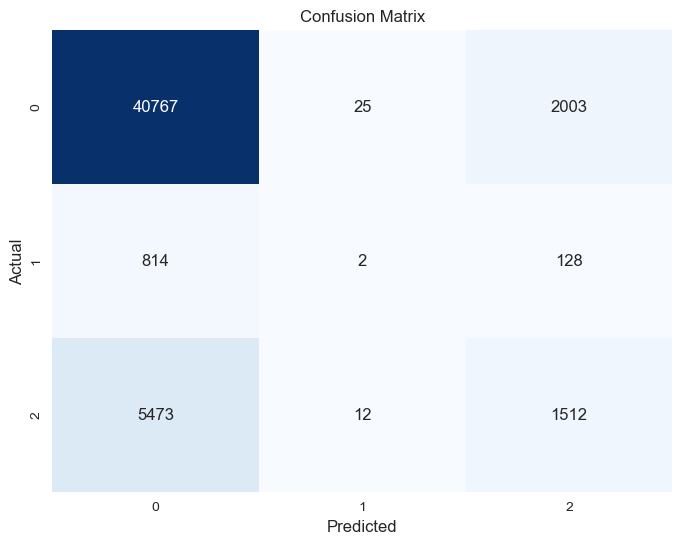

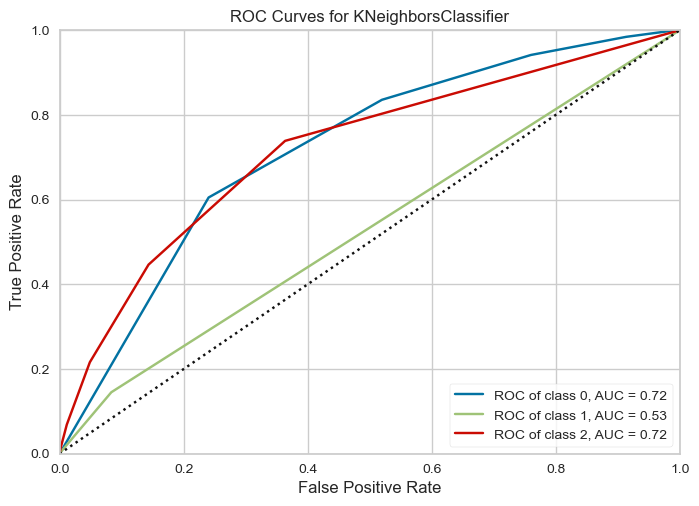

Model: RandomForestClassifier
Accuracy: 0.8429
Classification Report:
              precision    recall  f1-score   support

           0     0.8653    0.9668    0.9133     42795
           1     0.0000    0.0000    0.0000       944
           2     0.4808    0.1982    0.2807      6997

    accuracy                         0.8429     50736
   macro avg     0.4487    0.3884    0.3980     50736
weighted avg     0.7962    0.8429    0.8090     50736



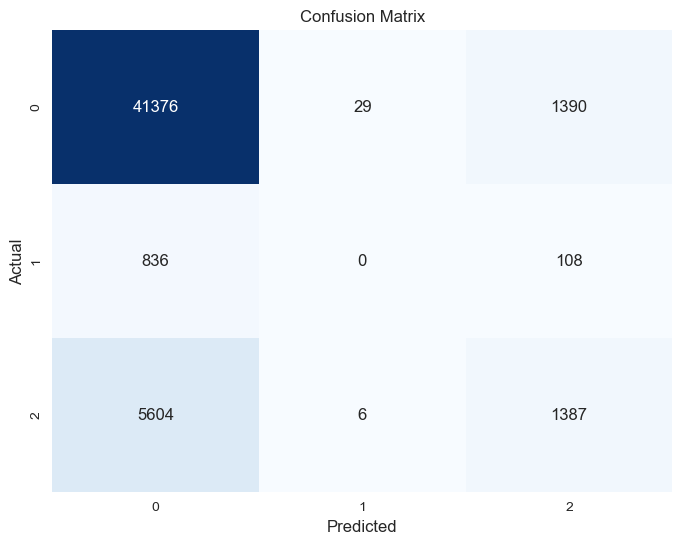

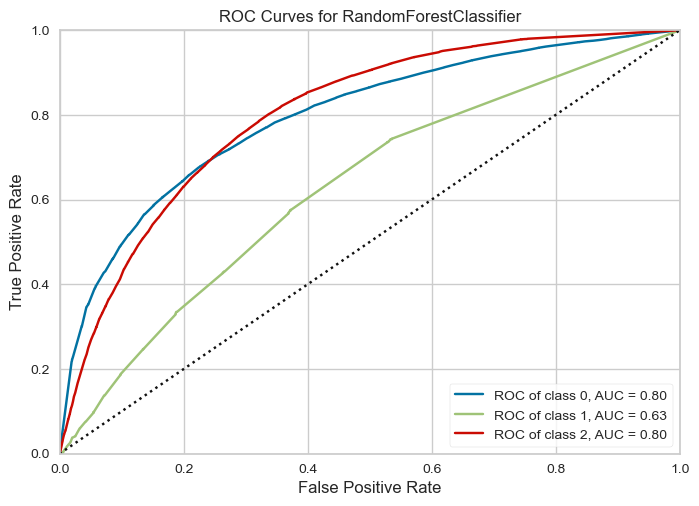

Model: DecisionTreeClassifier
Accuracy: 0.7703
Classification Report:
              precision    recall  f1-score   support

           0     0.8781    0.8583    0.8681     42795
           1     0.0344    0.0424    0.0380       944
           2     0.2982    0.3299    0.3132      6997

    accuracy                         0.7703     50736
   macro avg     0.4036    0.4102    0.4064     50736
weighted avg     0.7824    0.7703    0.7761     50736



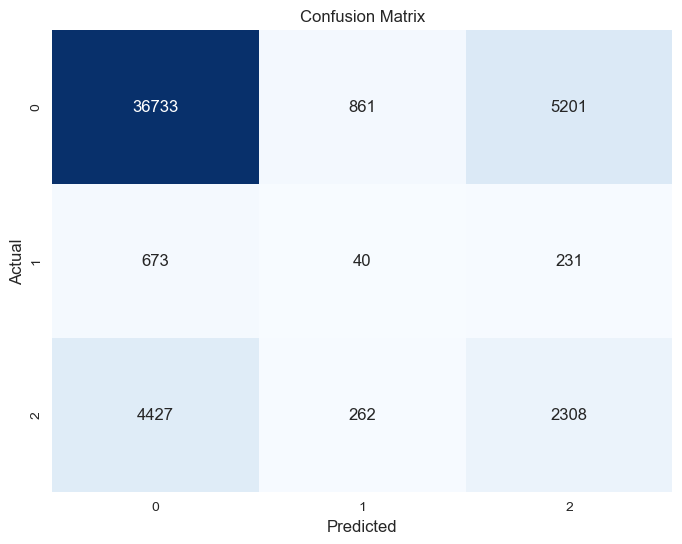

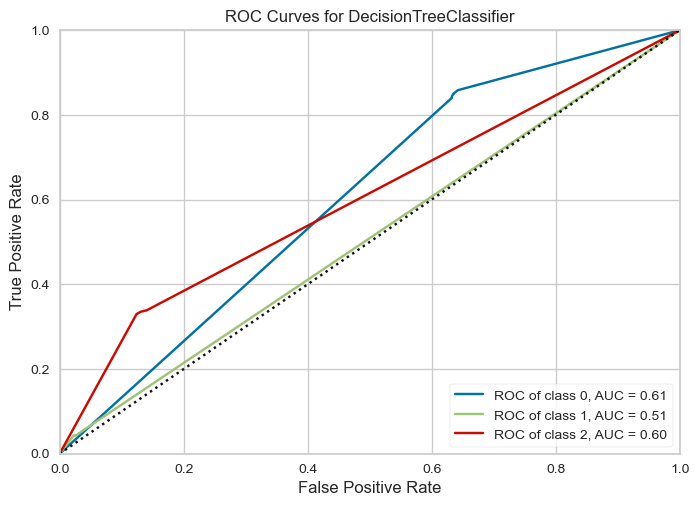

Model: ExtraTreesClassifier
Accuracy: 0.8331
Classification Report:
              precision    recall  f1-score   support

           0     0.8656    0.9533    0.9073     42795
           1     0.0092    0.0011    0.0019       944
           2     0.4212    0.2105    0.2807      6997

    accuracy                         0.8331     50736
   macro avg     0.4320    0.3883    0.3966     50736
weighted avg     0.7884    0.8331    0.8041     50736



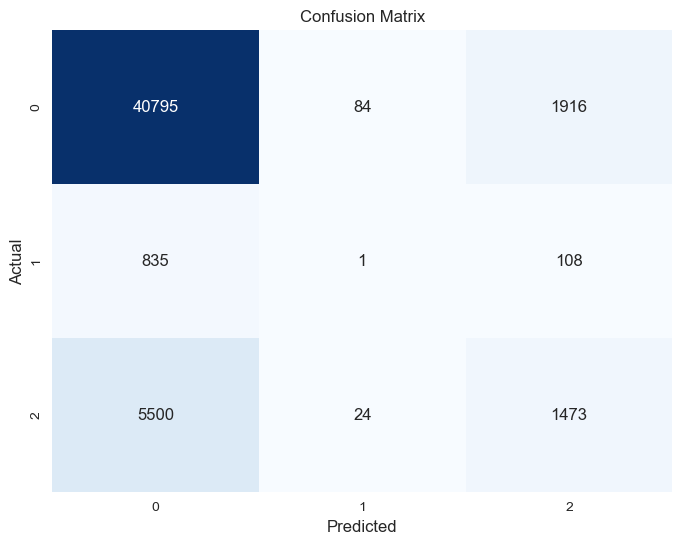

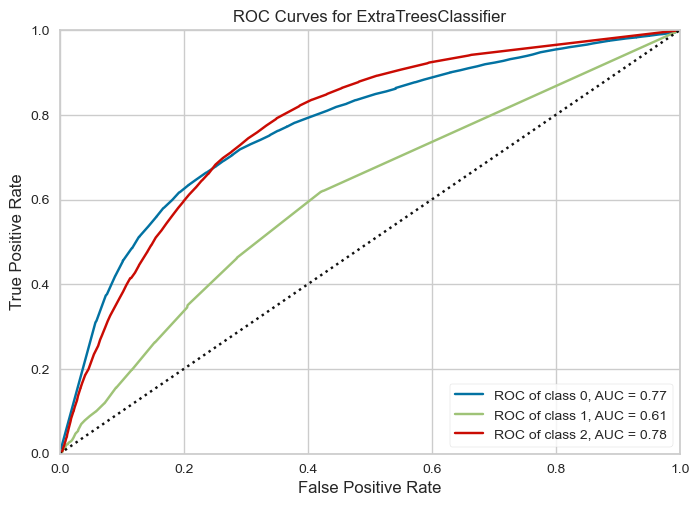

In [15]:
# Define a list of models to evaluate
models = [KNeighborsClassifier(),RandomForestClassifier(), DecisionTreeClassifier(),ExtraTreesClassifier()]

for model in models:
    train_and_evaluate_model(model,  X_train, y_train, X_test, y_test)

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE
# Apply SMOTE to upsample the minority class
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)

In [17]:
X_over_train,X_over_test,y_over_train,y_over_test=train_test_split(X_over,y_over,test_size=0.2,random_state=42,stratify=y_over)

Model: KNeighborsClassifier
Accuracy: 0.8478
Classification Report:
              precision    recall  f1-score   support

           0     0.9268    0.6316    0.7512     42740
           1     0.8600    0.9846    0.9181     42741
           2     0.7901    0.9273    0.8532     42741

    accuracy                         0.8478    128222
   macro avg     0.8590    0.8478    0.8409    128222
weighted avg     0.8590    0.8478    0.8409    128222



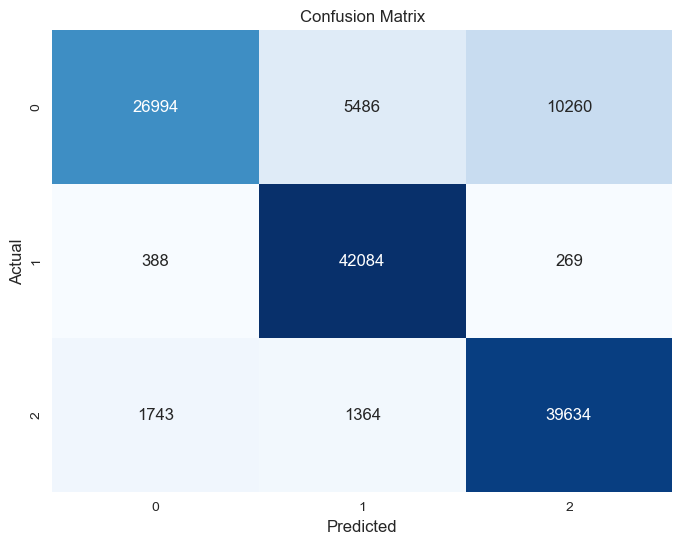

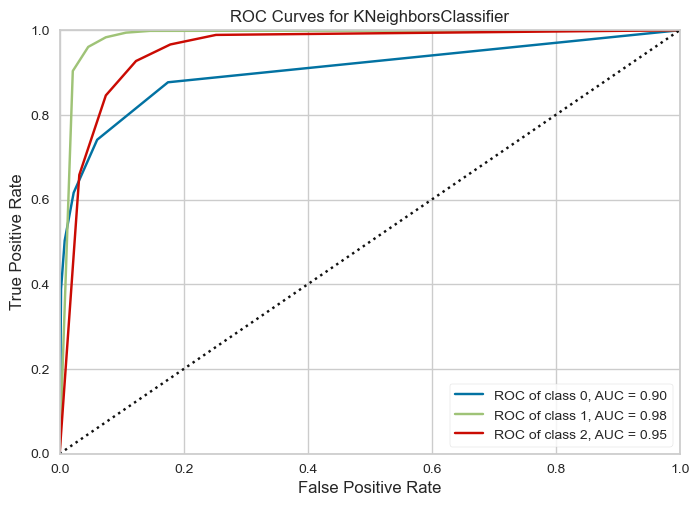

Model: RandomForestClassifier
Accuracy: 0.9263
Classification Report:
              precision    recall  f1-score   support

           0     0.9129    0.8900    0.9013     42740
           1     0.9788    0.9750    0.9769     42741
           2     0.8881    0.9139    0.9008     42741

    accuracy                         0.9263    128222
   macro avg     0.9266    0.9263    0.9263    128222
weighted avg     0.9266    0.9263    0.9263    128222



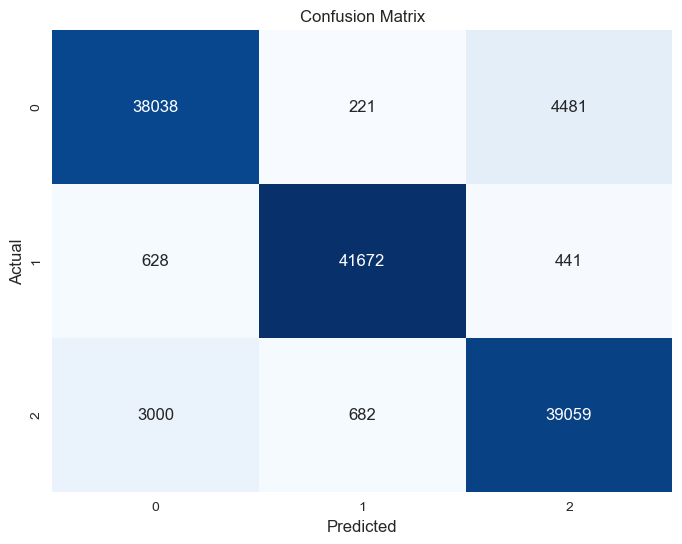

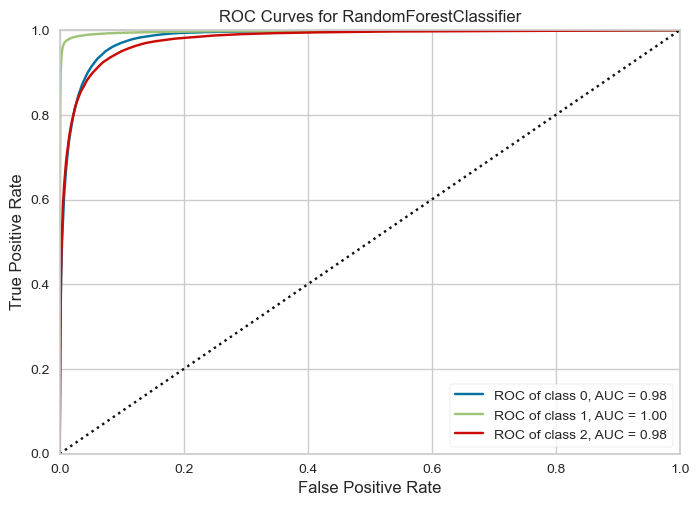

Model: DecisionTreeClassifier
Accuracy: 0.8509
Classification Report:
              precision    recall  f1-score   support

           0     0.8623    0.8385    0.8502     42740
           1     0.8850    0.9209    0.9026     42741
           2     0.8038    0.7934    0.7986     42741

    accuracy                         0.8509    128222
   macro avg     0.8504    0.8509    0.8505    128222
weighted avg     0.8504    0.8509    0.8505    128222



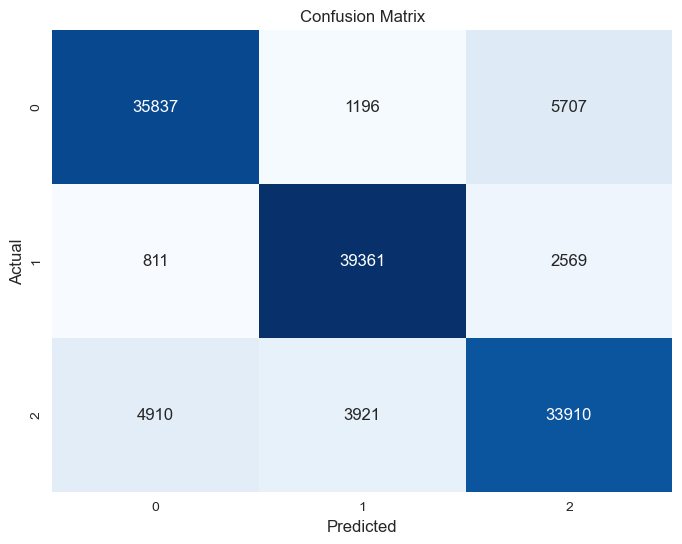

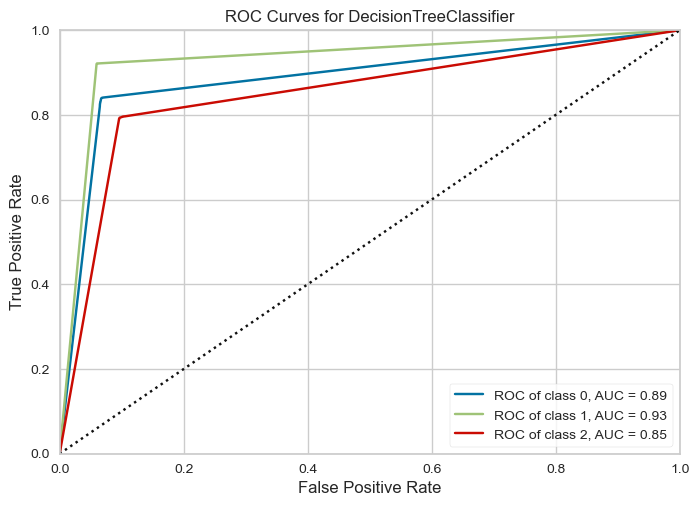

Model: ExtraTreesClassifier
Accuracy: 0.9191
Classification Report:
              precision    recall  f1-score   support

           0     0.9101    0.8617    0.8853     42740
           1     0.9726    0.9807    0.9766     42741
           2     0.8756    0.9148    0.8948     42741

    accuracy                         0.9191    128222
   macro avg     0.9194    0.9191    0.9189    128222
weighted avg     0.9194    0.9191    0.9189    128222



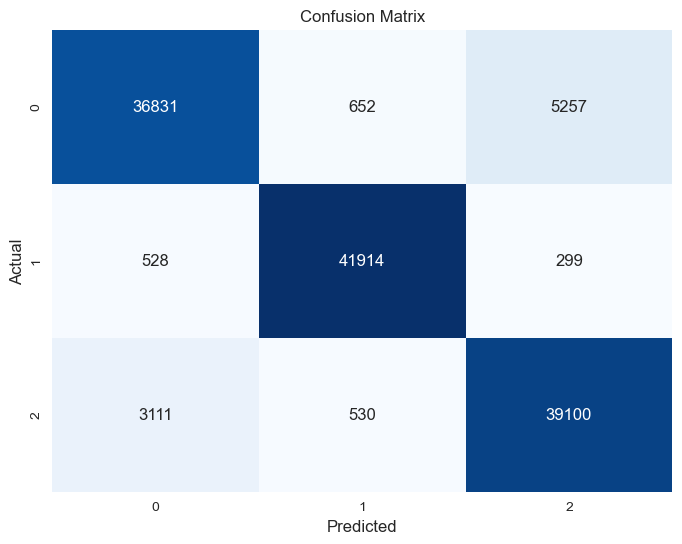

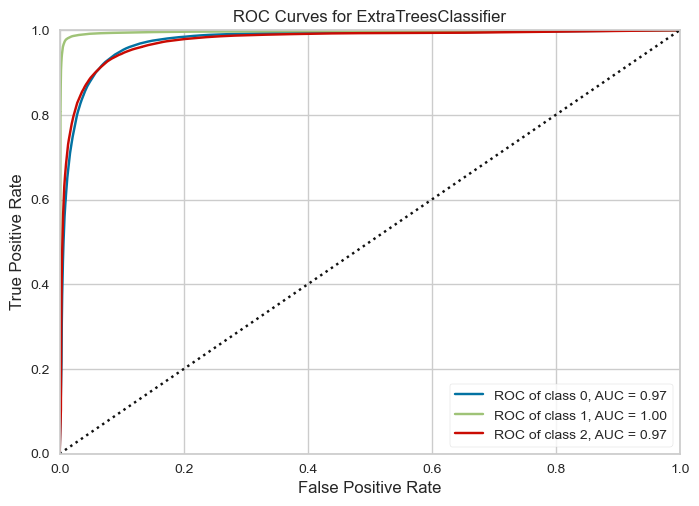

In [19]:
# Define a list of models to evaluate
models = [KNeighborsClassifier(),RandomForestClassifier(), DecisionTreeClassifier(),ExtraTreesClassifier()]

for model in models:
    train_and_evaluate_model(model,  X_over_train, y_over_train, X_over_test, y_over_test)

Model: KNeighborsClassifier
Accuracy: 0.8843
Classification Report:
              precision    recall  f1-score   support

           0     0.8688    0.7957    0.8307     42740
           1     0.9166    0.9788    0.9467     42741
           2     0.8642    0.8782    0.8712     42741

    accuracy                         0.8843    128222
   macro avg     0.8832    0.8843    0.8828    128222
weighted avg     0.8832    0.8843    0.8828    128222



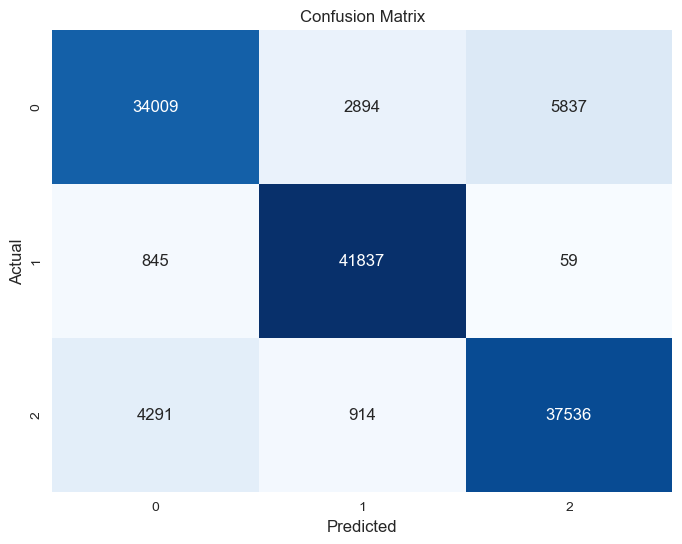

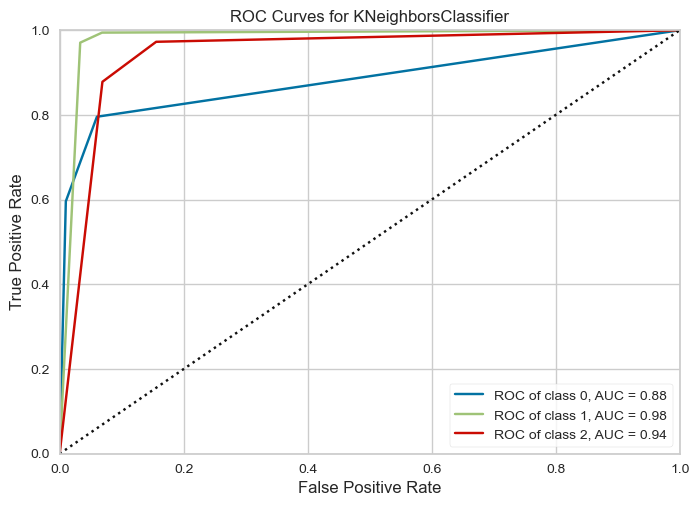

Model: RandomForestClassifier
Accuracy: 0.9248
Classification Report:
              precision    recall  f1-score   support

           0     0.9114    0.8832    0.8970     42740
           1     0.9815    0.9750    0.9782     42741
           2     0.8832    0.9164    0.8995     42741

    accuracy                         0.9248    128222
   macro avg     0.9253    0.9248    0.9249    128222
weighted avg     0.9253    0.9248    0.9249    128222



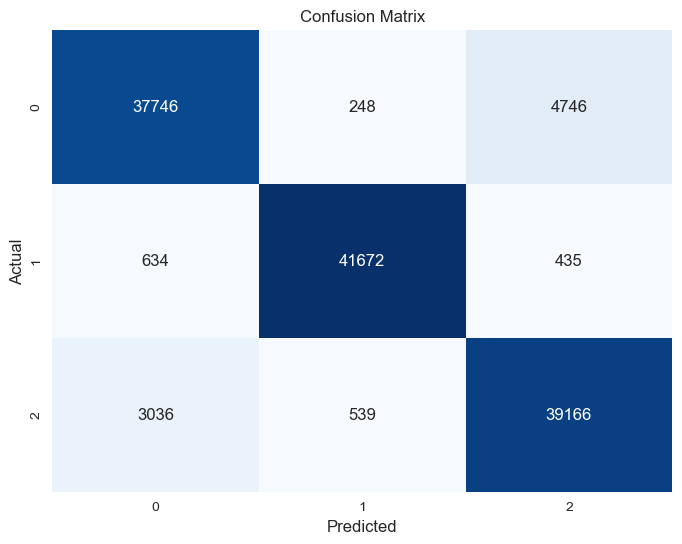

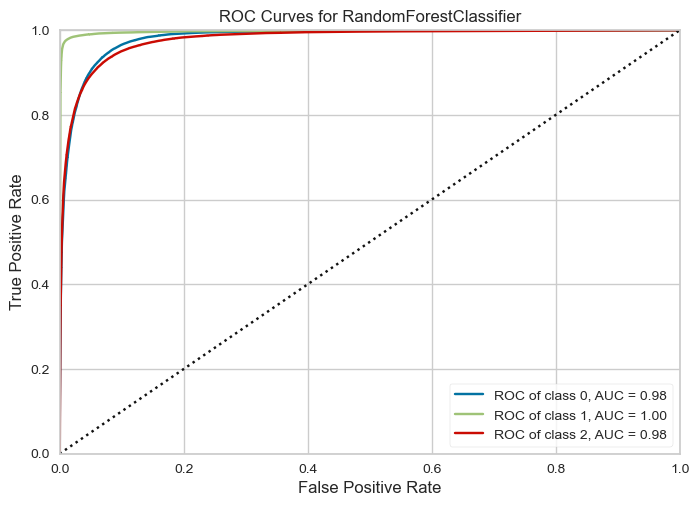

Model: DecisionTreeClassifier
Accuracy: 0.8490
Classification Report:
              precision    recall  f1-score   support

           0     0.8570    0.8404    0.8486     42740
           1     0.8861    0.9187    0.9021     42741
           2     0.8020    0.7880    0.7949     42741

    accuracy                         0.8490    128222
   macro avg     0.8484    0.8490    0.8485    128222
weighted avg     0.8484    0.8490    0.8485    128222



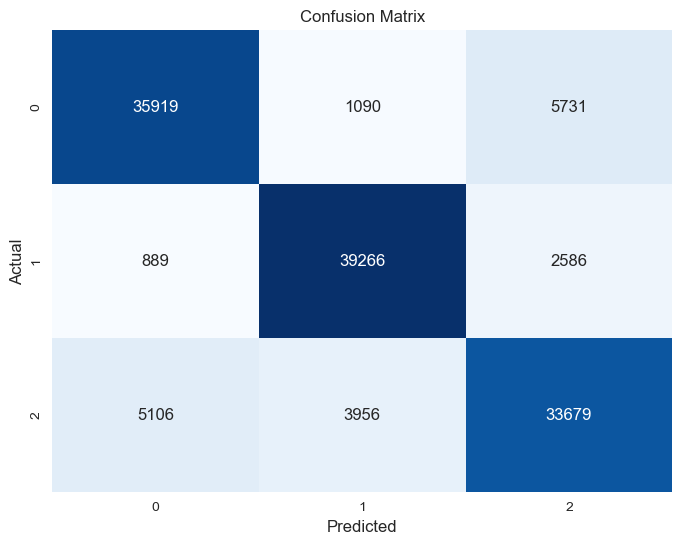

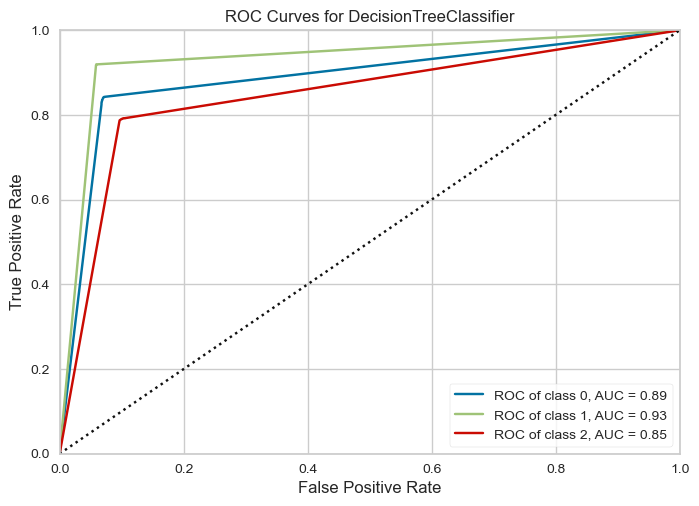

Model: ExtraTreesClassifier
Accuracy: 0.9208
Classification Report:
              precision    recall  f1-score   support

           0     0.9129    0.8630    0.8873     42740
           1     0.9740    0.9812    0.9776     42741
           2     0.8767    0.9182    0.8970     42741

    accuracy                         0.9208    128222
   macro avg     0.9212    0.9208    0.9206    128222
weighted avg     0.9212    0.9208    0.9206    128222



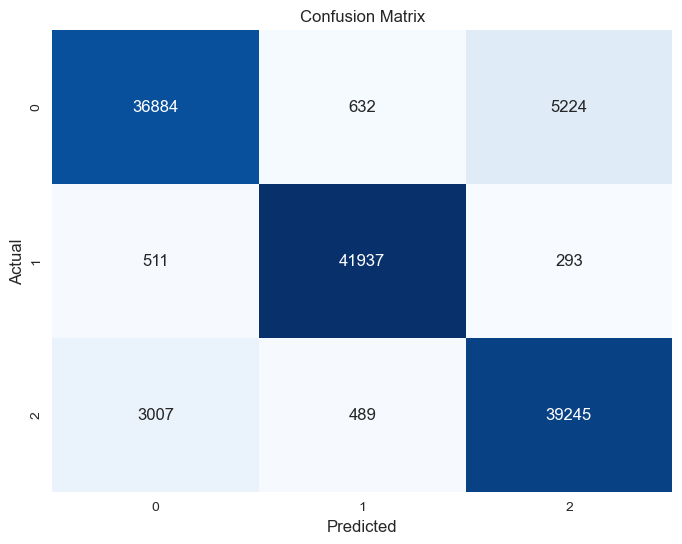

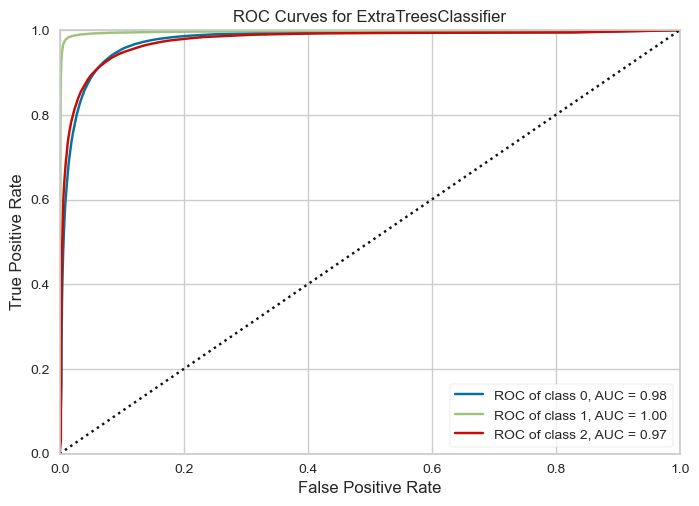

In [20]:
# Define a list of models to evaluate
models = [KNeighborsClassifier( n_neighbors=2),RandomForestClassifier(max_features=2,n_estimators=1000), DecisionTreeClassifier(criterion='entropy',max_depth=150,min_samples_leaf=1,min_samples_split=1,max_features=8),ExtraTreesClassifier(n_estimators=1000)]

for model in models:
    train_and_evaluate_model(model,  X_over_train, y_over_train, X_over_test, y_over_test)